# RDKit overview for Hackathon

This overview gives you a quick look at some of the important features of RDKit that can be helpful for your hackathon project. To supplement your understanding, there are numerous exceptional resources available online, including official documentation and informative blog posts.

Here are a few resources that might be helpful to check out. I have some of these links in examples below as well.

* "Getting started with RDKit" page: https://www.rdkit.org/docs/GettingStartedInPython.html
* RDKit python API: https://www.rdkit.org/docs/api-docs.html
    * `Chem.Mol`: https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.Mol
    * `Chem.Atom`: https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.Atom
    * `Chem.Bond`: https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.Bond
    * `Chem.RingInfo`: https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.RingInfo
    * Drawing module: https://www.rdkit.org/docs/source/rdkit.Chem.Draw.rdMolDraw2D.html

* RDKit github page: https://github.com/rdkit/rdkit

Also, feel free to use this jupyter notebook to get familiar with the RDKit API. 

In [1]:
from rdkit import Chem

from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

# For displaying in jupyter notebook
from IPython.display import SVG
IPythonConsole.ipython_useSVG=True
IPythonConsole.drawOptions.minFontSize = 16
IPythonConsole.molSize = (900, 300)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Reading and writing molecules with SMILES

For the purpose of this project, it will probably make sense to use SMILES to represent molecules in string form, although there are other text formats that you may run into while looking through the RDKit documention.

### What is SMILES (simplified molecular-input line-entry system)

SMILES is essentially a string representation of a molecule that uses a combination of letters, numbers, and symbols to represent the atoms and bonding in a chemical compound. In a SMILES string, atoms are represented by their chemical symbol (e.g. C for carbon, H for hydrogen, N for nitrogen, etc.), and bonds between atoms are represented by the characters "-" for a single bond, "=" for a double bond, and "#" for a triple bond. Atoms that are adjacent with no bond character are joined by a single bond.

For example, the SMILES string for ethanol (C2H5OH) would be "CCO" where C is for carbon and O is for oxygen. The first C is bonded to the second C, and the O is bonded to the second C.

There are also rules for branching, representing rings, and more -- if you are interested in learning more about SMILES, here are a couple resources:

* https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system
* https://www.daylight.com/dayhtml/doc/theory/theory.smiles.html


### Reading and writing SMILES in RDKit

The API to read and write SMILES in RDKit is pretty simple! Here are some examples.

Output smiles is Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2)cc1


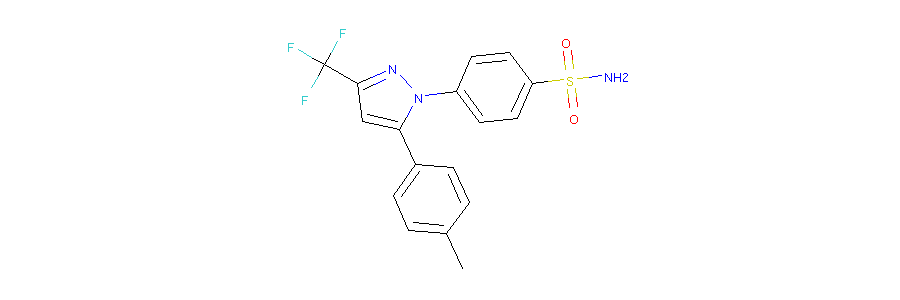

In [2]:
mol = Chem.MolFromSmiles("Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2)cc1")
roundtrip_smi = Chem.MolToSmiles(mol)
print(f"Output smiles is {roundtrip_smi}")
mol

Output smiles is O=C(CC(O)c1ccccc1Cl)NO


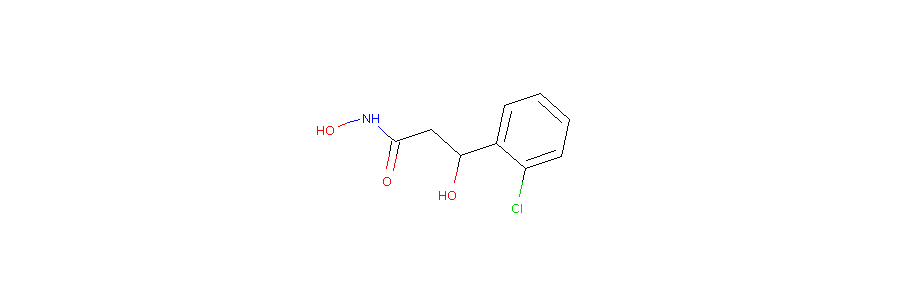

In [3]:
mol = Chem.MolFromSmiles("ONC(=O)CC(O)C1=CC=CC=C1Cl")
roundtrip_smi = Chem.MolToSmiles(mol)
print(f"Output smiles is {roundtrip_smi}")
mol

### SMILES extensions: CXSMILES

One of the limitations of SMILES is that it only represents basic information of a molecule. Extended SMILES (or CXSMILES) provides an additional annotation that can be used to track properties when writing a molecule to SMILES. You can read more about CXSMILES here: https://docs.chemaxon.com/display/docs/chemaxon-smiles-extensions.md

For this project, I think this is most relevant when reading a core with rgroups. We can still use the same `MolFromSmiles` to read CXSMILES, but a different function is used to write CXSMILES.

SMILES: *C1CC(*)OC(*)C1
CXSMILES: *C1CC(*)OC(*)C1 |$R2;;;;R1;;;R3;$|


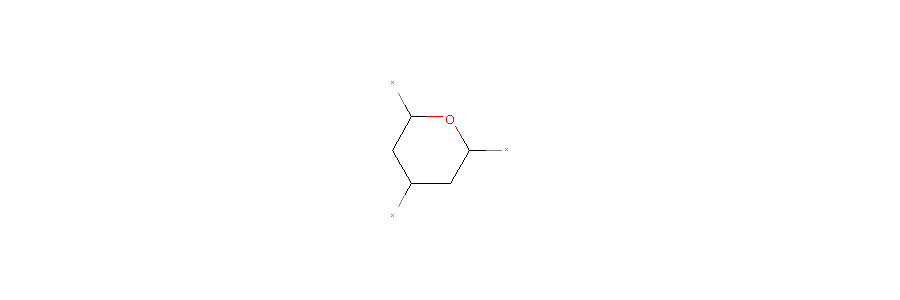

In [4]:
core = Chem.MolFromSmiles("[*]C1CC([*])CC([*])O1 |$R1;;;;R2;;;R3;$|")
roundtrip_smi = Chem.MolToSmiles(core)
roundtrip_cxsmi = Chem.MolToCXSmiles(core)
print(f"SMILES: {roundtrip_smi}")
print(f"CXSMILES: {roundtrip_cxsmi}") # the output to this is a little weird, but we still have the r labels!
core

### Wait.. where are the hydrogens?

If you've taken a chemistry class before, you might notice that all of these examples are missing hydrogens in their depictions and tend to have them noted on an adjacent neighbor instead. This is because hydrogen count (unless otherwise specified) can be calculated using atomic properties, so including them explicitly is usually unneccesary and can be more cluttering to look at in a depiction.

SMILES after explicit hydrogens are added: [H]c1c([H])c(C([H])([H])[H])c([H])c([H])c1-c1c([H])c(C(F)(F)F)nn1-c1c([H])c([H])c(S(=O)(=O)N([H])[H])c([H])c1[H]


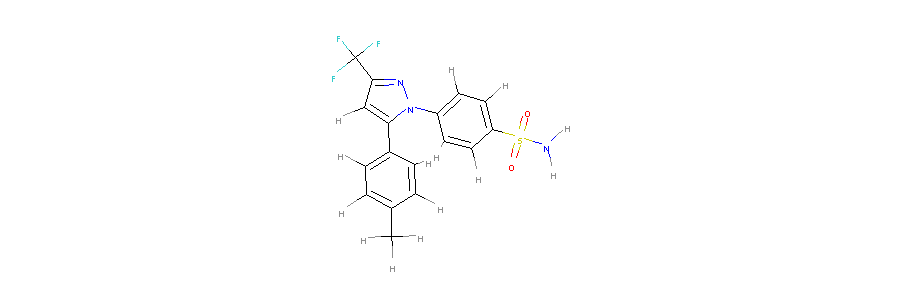

In [5]:
mol = Chem.MolFromSmiles("Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2)cc1")
with_hs = Chem.AddHs(mol)
print(f"SMILES after explicit hydrogens are added: {Chem.MolToSmiles(with_hs)}")
with_hs

## Make your own structure!

It can be annoying/difficult to write down the SMILES for complicated structures that you have in mind -- so use our tool https://files.schrodinger-ml.com/public/sketcher/latest/wasm_shell.html to sketch a structure then export it to SMILES.

# The RDKit Mol

The RDKit ROMol (or `Chem.Mol` in the python API) object contains information about the atoms, bonds, and properties of molecule. The "getting started with RDKit" doc has fantastic documentation on working with mols that I recommend checking out: https://www.rdkit.org/docs/GettingStartedInPython.html#working-with-molecules

Some specific links to the API that can be EXTREMELY helpful:

* `Chem.Mol`: https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.Mol
* `Chem.Atom`: https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.Atom
* `Chem.Bond`: https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.Bond
* `Chem.RingInfo`: https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.RingInfo

## Drawing an RDKit Mol

This is pretty easy in a jupyter notebook as you've seen! Making an actual SVG for your hackathon project requires a few more lines, though. This function is provided in the hackathon template but can also be used from the jupyter notebook:

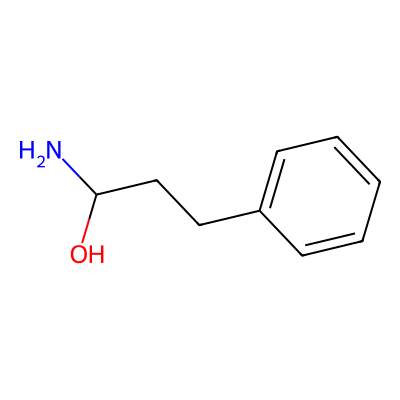

In [6]:
def generate_image(mol_smi: str, width: int = 400, height: int = 400) -> str:
    """
    Generates an image of an rdkit mol represented by the given smiles.

    :param mol_smi: SMILES of mol to display
    :param width: width of the image
    :param height: height of the image
    :return: generated image as an SVG string
    """
    mol = Chem.MolFromSmiles(mol_smi)
    drawer = Draw.rdMolDraw2D.MolDraw2DSVG(width, height)
    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()
    return drawer.GetDrawingText().encode()
SVG(generate_image("NC(O)CCC1=CC=CC=C1"))

It also might be helpful to use `DrawMolsToGridImage` draw multiple mols in jupyter notebook.

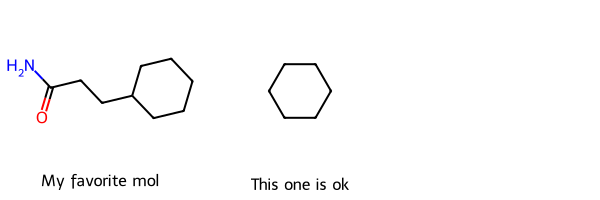

In [7]:
mol = Chem.MolFromSmiles("NC(=O)CCC1CCCCC1")
another_mol = Chem.MolFromSmiles("C1CCCCC1")
Draw.MolsToGridImage([mol,another_mol], legends=["My favorite mol", "This one is ok"])

## Iterating over atoms & bonds

`Chem.Atom` and `Chem.Bond` represent atoms and bonds within a mol. The getting started doc goes into more detail, but here is a quick example of how to itereate over atoms and bonds and look at their properties:

In [8]:
for at in mol.GetAtoms():
    print(f"Atom {at.GetIdx()} has atomic num {at.GetAtomicNum()}")

print()
for bnd in mol.GetBonds():
    print(f"Bond {bnd.GetIdx()} is between atoms {bnd.GetBeginAtomIdx()} and {bnd.GetEndAtomIdx()} and has order {bnd.GetBondType()}")

Atom 0 has atomic num 7
Atom 1 has atomic num 6
Atom 2 has atomic num 8
Atom 3 has atomic num 6
Atom 4 has atomic num 6
Atom 5 has atomic num 6
Atom 6 has atomic num 6
Atom 7 has atomic num 6
Atom 8 has atomic num 6
Atom 9 has atomic num 6
Atom 10 has atomic num 6

Bond 0 is between atoms 0 and 1 and has order SINGLE
Bond 1 is between atoms 1 and 2 and has order DOUBLE
Bond 2 is between atoms 1 and 3 and has order SINGLE
Bond 3 is between atoms 3 and 4 and has order SINGLE
Bond 4 is between atoms 4 and 5 and has order SINGLE
Bond 5 is between atoms 5 and 6 and has order SINGLE
Bond 6 is between atoms 6 and 7 and has order SINGLE
Bond 7 is between atoms 7 and 8 and has order SINGLE
Bond 8 is between atoms 8 and 9 and has order SINGLE
Bond 9 is between atoms 9 and 10 and has order SINGLE
Bond 10 is between atoms 10 and 5 and has order SINGLE


## You can also set properties on atoms and bonds

One specifically helpful property is `atomLabel` because it will show up in your depictions :)

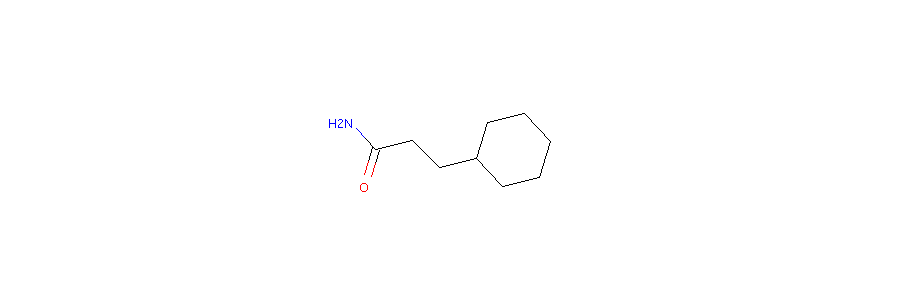

In [9]:
for at in mol.GetAtoms():
    at.SetProp('atomLabel', str(at.GetIdx()))
mol

## Substructure matching

While we have these atom labels, its a good time to look at substructure matching. This is something you could possibly use as a search filter for your products or a way to highlight certain fragments of a molecule.

Substruct match is (5, 6, 7, 8, 9, 10)


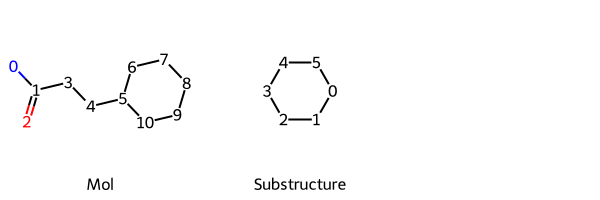

In [10]:
substruct = Chem.MolFromSmiles("C1CCCCC1")
for at in substruct.GetAtoms():
    at.SetProp('atomLabel', str(at.GetIdx()))
match = mol.GetSubstructMatch(substruct)
print(f"Substruct match is {match}")
Draw.MolsToGridImage([mol,substruct], legends=["Mol", "Substructure"])

Here, `match[substructure_atom_index] = mol_atom_index` -- meaning atom 0 in the substructure matches to atom 5 in the mol, atom 1 matches to atom 6, and so on.

You can get more possible substructure matches by using `Chem.Mol.GetSubstructMatches` instead

## Additional draw options

I highly recommend trying out some additional drawing options provided by the python API here https://www.rdkit.org/docs/source/rdkit.Chem.Draw.rdMolDraw2D.html#rdkit.Chem.Draw.rdMolDraw2D.MolDrawOptions

One interesting thing you can do is use a substructure match (or just a list of atom indices) to highlight atoms in a molecule.

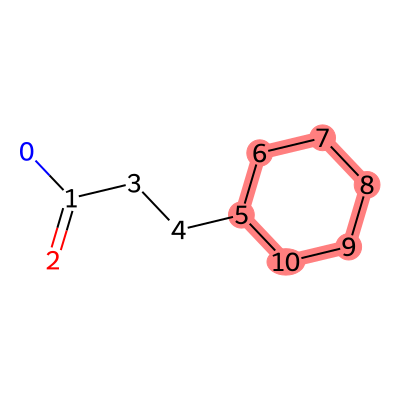

In [11]:
drawer = Draw.rdMolDraw2D.MolDraw2DSVG(400, 400)
drawer.DrawMolecule(mol, highlightAtoms=match)
drawer.FinishDrawing()
svg_data = drawer.GetDrawingText().encode()
SVG(svg_data)

## Aligning a mol to a substructure

We can use `GenerateDepictionMatching2DStructure` to align a molecule to a substructure. This could be a nice addition to an app that performs rgroup enumeration so that the products all align to the core.

Before we do this, we will need to make sure that coordinates exist on the substructure we are aligning to. 2D and 3D coordinates are not stored on RDKit mols themselves, but on a Conformer object that is on an RDKit mol. To assign 2D coordinates to an RDKit mol, use either `Chem.rdCoordGen.AddCoords` or `Chem.rdDepictor.Compute2DCoords`.

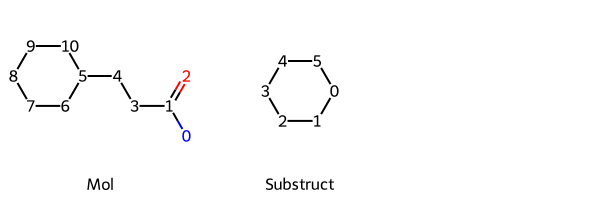

In [12]:
# calculate coordinates for the substructure!
Chem.rdDepictor.Compute2DCoords(substruct)

# this will add coordinates to mol
Chem.rdDepictor.GenerateDepictionMatching2DStructure(mol, substruct)
Draw.MolsToGridImage([mol, substruct],legends=["Mol", "Substruct"])

## Quick tip!

If you ever see an error when drawing that looks like 

```
ValueError: Bad Conformer Id
```

you probably need to add coordinates to an rdkit mol somewhere using the functions I mentioned above.

## The RWMol

You cannot add or remove atoms or bonds to a regular RDKit mol, so in order to change your structure, you will have to make an RWMol first. Here is the API for RWMol: https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.RWMol

A quick example of using an RWMol to make a copy of an existing mol, then edit it:

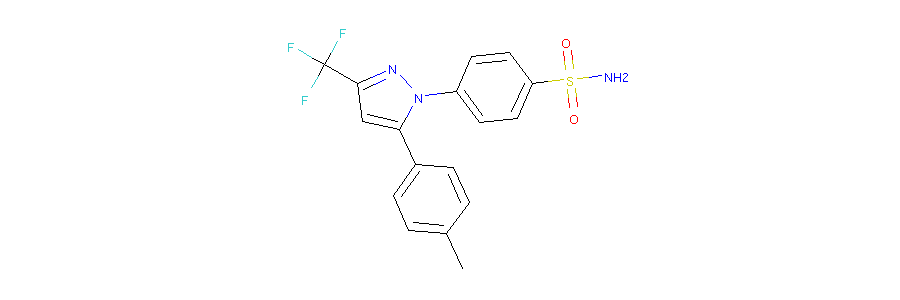

In [13]:
original_mol = Chem.MolFromSmiles("Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2)cc1")
original_mol

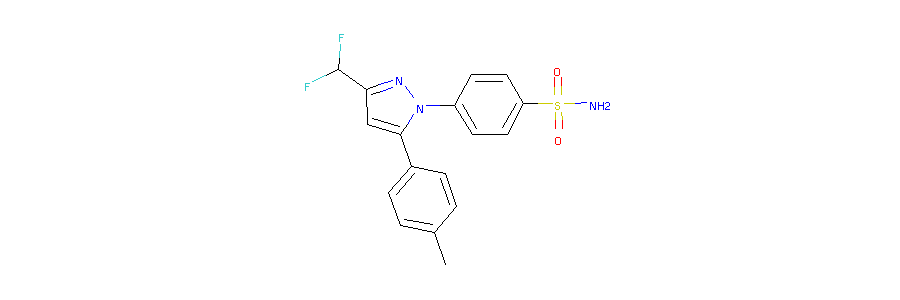

In [14]:
edit_mol = Chem.RWMol(original_mol)

# removing one of the flourides
edit_mol.RemoveAtom(10)
edit_mol

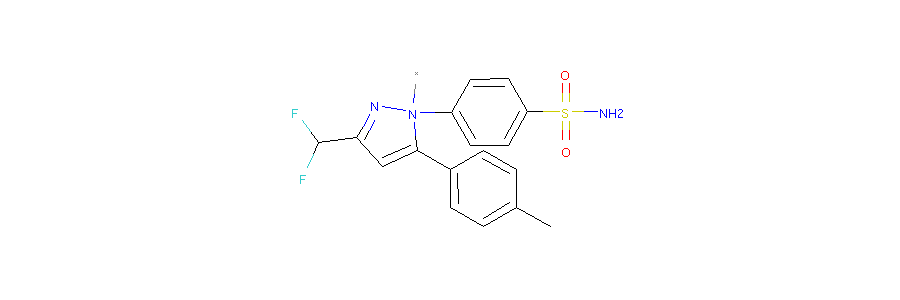

In [15]:
# lets add an atom and bond
new_at_idx = edit_mol.AddAtom(Chem.Atom(0)) # a dummy atom -- no atomic number
edit_mol.AddBond(12, new_at_idx, Chem.BondType.SINGLE)
edit_mol

# What else could we do with RDKit for this project?

You aren't required to do any of this in your project, these are just some ideas.

Note: This is from last year's hackathon. Still feel free to use it!

## 1. RGroup enumeration

RGroup enumeration is a great place to start for this project because it will give you a set of molecules to analyze. You will probably want to write a function like 
```
def rgroup_enumerate(core_smi: str, rgroup_smiles: Dict[str, List[str]) -> str
```
and the core smiles and rgroup smiles could be provided via the UI. This function would calculate every combination of the rgroups attached to the core. Here is an example:

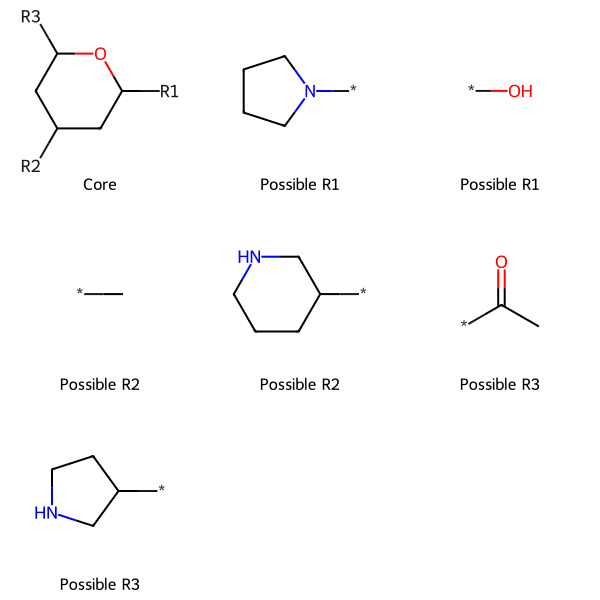

In [16]:
core_smi = "[*]C1CC([*])CC([*])O1 |$R1;;;;R2;;;R3;$|"
rgroup_smiles = {
    "R1" : ["*N1CCCC1", "*O"],
    "R2" : ["*C", "*C1CCCNC1"],
    "R3" : ["CC(-*)=O", "*-C1CCNC1"]
}

all_mols = [Chem.MolFromSmiles(core_smi)]
legends = ["Core"]
for k, v in rgroup_smiles.items():
    for m_smi in v:
        all_mols.append(Chem.MolFromSmiles(m_smi))
        legends.append(f"Possible {k}")
Draw.MolsToGridImage(all_mols,legends=legends,molsPerRow=3)

These are the possible products for this enumeration -- since there are 2 possible R1s, 2 possible R2s, and 2 possible R3s, there are 2^3 = 8 total products.

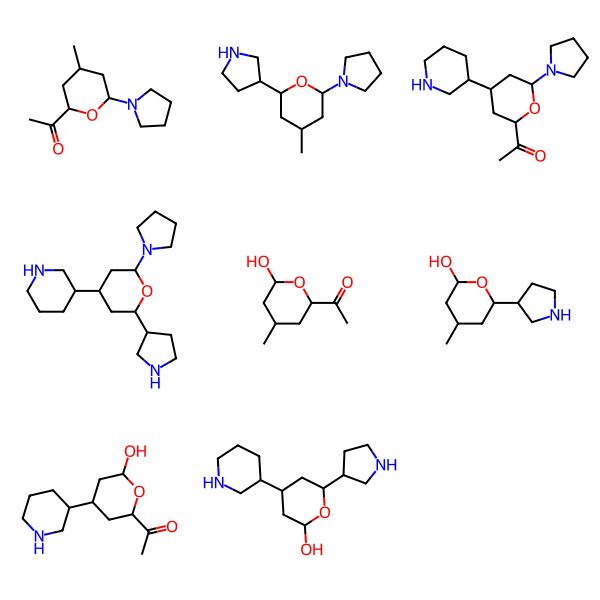

In [17]:
product_smis = ["CC(=O)C1CC(C)CC(N2CCCC2)O1","CC1CC(C2CCNC2)OC(N2CCCC2)C1","CC(=O)C1CC(C2CCCNC2)CC(N2CCCC2)O1","C1CNCC(C2CC(C3CCNC3)OC(N3CCCC3)C2)C1","CC(=O)C1CC(C)CC(O)O1", "CC1CC(O)OC(C2CCNC2)C1", "CC(=O)C1CC(C2CCCNC2)CC(O)O1", "OC1CC(C2CCCNC2)CC(C2CCNC2)O1"]
products = [Chem.MolFromSmiles(smi) for smi in product_smis]
Draw.MolsToGridImage(products)

## Combining a core and rgroups to make a product

As mentioned in the "RWMol" section, you need to use a RWMol to add or remove bonds to a structure. When writing a function that performs rgroup enumeration, you will likely need a way to transform you core and set of rgroups into a single product. You can use this function (or write something like it yourself) to combine a core and rgroups together.

In [18]:
ATOM_PROP_ATOM_LABEL = 'atomLabel'
def _combine_core_and_rgroups(core, rgroups):
    """
    Helper function for rgroup enumeration
    """
    rgroup_names = rgroups.keys()
    product = Chem.RWMol(core)
    for at in core.GetAtoms():
        if at.HasProp(ATOM_PROP_ATOM_LABEL):
            label = at.GetProp(ATOM_PROP_ATOM_LABEL)
            if label not in rgroup_names:
                continue

            # find where the rgroup will attach to the existing
            # product
            attach_idx = None
            remove_idx = None
            rgroup = Chem.RWMol(rgroups[label])
            for rg_at in rgroup.GetAtoms():
                if rg_at.GetAtomicNum() == 0:
                    attach_idx = rg_at.GetNeighbors()[0].GetIdx()
                    if rg_at.GetIdx() < attach_idx:
                        # attach_idx will go down by 1
                        attach_idx -= 1
                    rgroup.RemoveAtom(rg_at.GetIdx())
                    break
            if attach_idx is None:
                raise ValueError("Invalid rgroup provided")

            prev_atom_count = product.GetNumAtoms()
            product = Chem.RWMol(Chem.CombineMols(product, rgroup))
            product.AddBond(at.GetNeighbors()[0].GetIdx(), attach_idx + prev_atom_count)

## 2. Read in a set of molecules, display them, and calculate and compare various properties

One great way to do this would be with the Chem.QED module. Read more about that module here: https://www.rdkit.org/docs/source/rdkit.Chem.QED.html

Here is the description of each of these properties calculated by QED, from "Quantifying the chemical beauty of drugs"

```
Eight widely-used molecular properties were selected on the basis of published precedence for their relevance in determining druglikeness 3, 5, 22, 23:
    * MW: molecular weight
    * ALOGP: octanol-water partition coefficient
    * HBD: number of hydrogen bond donors 
    * HBA: number of hydrogen bond acceptors
    * PSA: molecular polar surface area
    * ROTB: number of rotatable bonds
    * AROM: the number of aromatic rings
    * ALERTS: number of structural alerts
```


Some more ideas:
* Generate a table with images of each molecule and other properties in the columns
* Create a substructure search filter to run on a set of molecules, then only show the molecules that match the filter
* Create other filters for any of the properties
* Use the QED properties could also be used to determine whether a molecule passes the "Rule of 5" (or variations of it): https://en.wikipedia.org/wiki/Lipinski%27s_rule_of_five
* Use a data visualization library to visualize all these properties for your set of molecules

In [19]:
from rdkit.Chem import QED

mol = Chem.MolFromSmiles("Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2)cc1")
props = QED.properties(mol)
print(props)

QEDproperties(MW=381.3790000000001, ALOGP=3.5139200000000006, HBA=3, HBD=1, PSA=77.98, ROTB=3, AROM=3, ALERTS=0)


## 3. Tautomer enumeration

Tautomers are isomers of a molecule which differ only in the position of the protons and electrons. Check out some online resources for an explanantion/overview of tautomerization. This could be another way to enumerate through different variations of a molecule (or possibly an option to add to substructure search or rgroup enumeration).
* https://en.wikipedia.org/wiki/Tautomer
* https://byjus.com/jee/tautomerism/

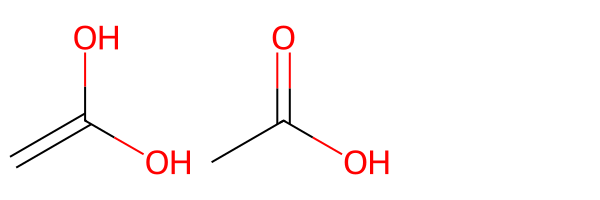

In [20]:
from rdkit.Chem.MolStandardize import rdMolStandardize

# create a molecule object from a SMILES string
mol = Chem.MolFromSmiles("CC(=O)O")

# create a TautomerEnumerator object
te = rdMolStandardize.TautomerEnumerator()

# enumerate the tautomers
tautomers = te.Enumerate(mol)

# the hydrogen moved from 
Draw.MolsToGridImage(tautomers)

## 4. Use some other features in RDKit

These are some things you could do that would require a little more preparation. This might be a good place to go if you finish your original idea early.

* RGroup decomposition: https://greglandrum.github.io/rdkit-blog/posts/2023-01-09-rgd-tutorial.html
* Reaction API: https://www.rdkit.org/docs/source/rdkit.Chem.rdChemReactions.html
* Mol enumerator: https://greglandrum.github.io/rdkit-blog/posts/2021-05-13-intro-to-the-molecule-enumerator.html
    * would require using SDFs and not SMILES 
* Similarity maps: https://greglandrum.github.io/rdkit-blog/posts/2020-01-03-similarity-maps-with-new-drawing-code.html
* Stereoisomer enumeration: https://www.rdkit.org/docs/source/rdkit.Chem.EnumerateStereoisomers.html
* Work with more molecules/larger dataset -- check out CHEMBL https://www.ebi.ac.uk/chembl/g/#search_results/all

## 5. A communication tool

If your team isn't as interested in a lot of the science stuff, you can focus on making a web app that allows users to make notes on molecules or send them to collaborators. You could get creative with this! 

## 6. Some combination of 1-5 + adding your own ideas!

Feel free to browse the rdkit api and see if anything interests you! Ask questions, and play around with the API in a jupyter notebook a little bit. Get creative -- the problem statement is broad for a reason. 